***CSI 4106 Assignment 2***

Group 54

Tamara Micic (300163312) and Tanner Giddings (300172545)

**Question 1**

*Part A*

We chose to do analysis on the 16 personalities dataset. The goal is to predict a person's personality type based on how much they agree or disagree with a list of statements. This is not meant for any particular useful application, it is just for fun to see if we can correctly classify someone's personality type based on their agreement level with the statements.

*Justification of dataset*

For this project, we wanted to have the largest dataset possible so we could limit possible overfitting and could have a more accurate model. Therefore we started with the credit score dataset. However, we found it hard to include multiple different results for different times as we aren't familiar with techniques in time series analysis. Therefore we went for the dataset with the second most dataset, the 16 personalities dataset. Furthermore, we liked this dataset since the fields don't seem to have much correlation, which reduces the risks of multicolinearity.

*Part B*

This dataset contains 60000 samples ("people", but the data is synthetically generated) that can be used for training. There are 60 columns corresponding to attributes - they are all statements such as "You like to use organizing tools like schedules and lists." and "You often feel overwhelmed." where the person can assign values of -3, -2, -1, 0, 1, 2, or 3, which correspond to "Fully Disagree", "Partially Disagree", "Slightly Disagree", "Neutral", "Slightly Agree", "Partially Agree", and "Fully Agree", respectively. Finally, the last column is the response variable "Personality" which takes one of 16 values: ISTJ, ISFJ, INFJ, INTJ, ISTP, ISFP, INFP, INTP, ESTP, ESFP, ENFP, ENTP, ESTJ, ESFJ, ENFJ, ENTJ. These are the 16 personality types defined by the Myers-Briggs test. The letters mean the following:

  - Extroversion (E) or Introversion (I): The source and direction of personal energy expression.
  - Sensing (S) or Intuition (N): Method of gathering information.
  - Thinking (T) or Feeling (F): Decision-making process.
  - Judging (J) or Perceiving (P): Lifestyle orientation and how one deals with the external world.

There is no missing data in this dataset. All 16 personality types are present within the samples. It should be noted however that some attribute columns do not contain each agreement level. For example, the statement "You regularly make new friends." only has responses -1, 0, and 1.

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import math
import numpy as np
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/TannerGiddings21/CSI4106_A1/main/16P.csv"
data = pd.read_csv(url).drop(columns=['Response Id'])
X = data.drop(columns=['Personality'])
Y = data['Personality']

**Question 2**

*Part A*

We think that all the features in this dataset are useful. There are 60 statements that a person can agree or disagree with and we do not have the domain knowledge to decide to not include any of these statements. To our knowledge, any of them could be important to determining a person's personality type. So we will use all 60 features in our models. It is possible that some important features are missing, but again, we do not know since we do not have domain expertise.



*Part B*

Below we visualize the distribution of each attribute and the response variable. The attributes seem to be normally distributed and the response variable seems to be uniformly distributed. Therefore we do not think that it would be useful to do attribute normalisation, as they are already normalized.

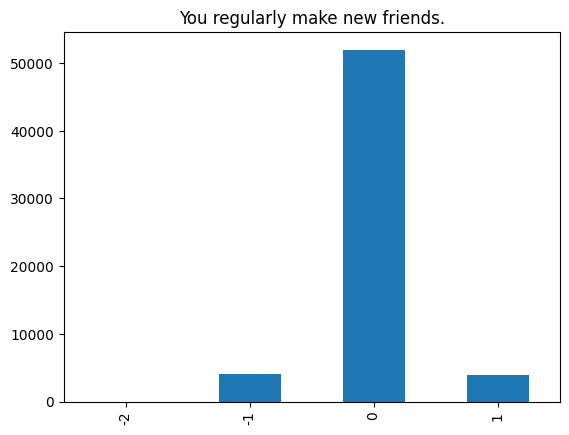

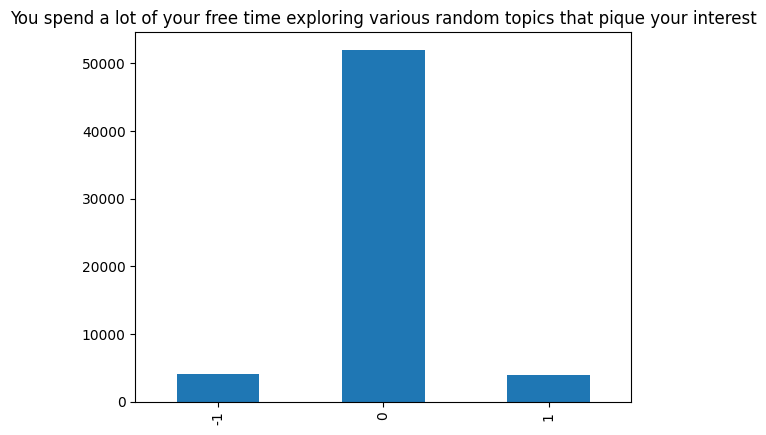

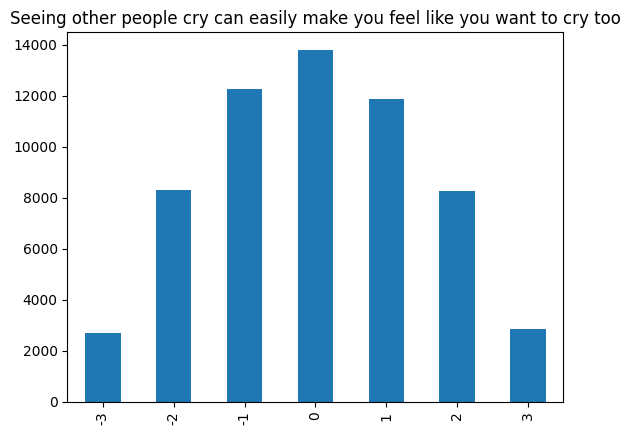

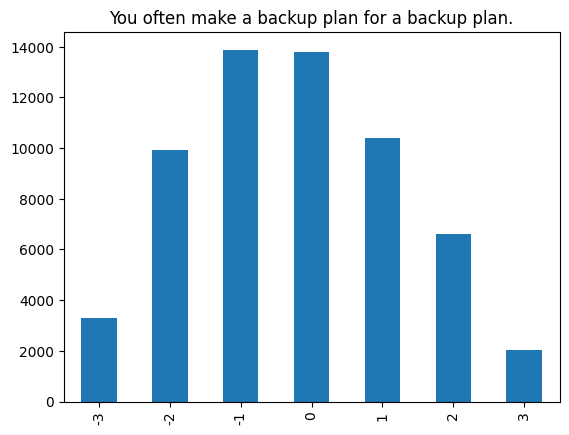

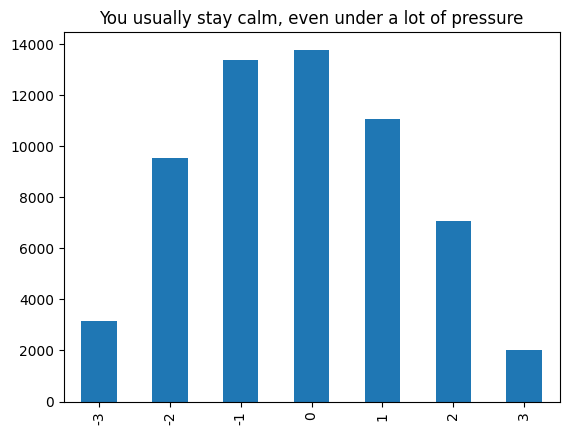

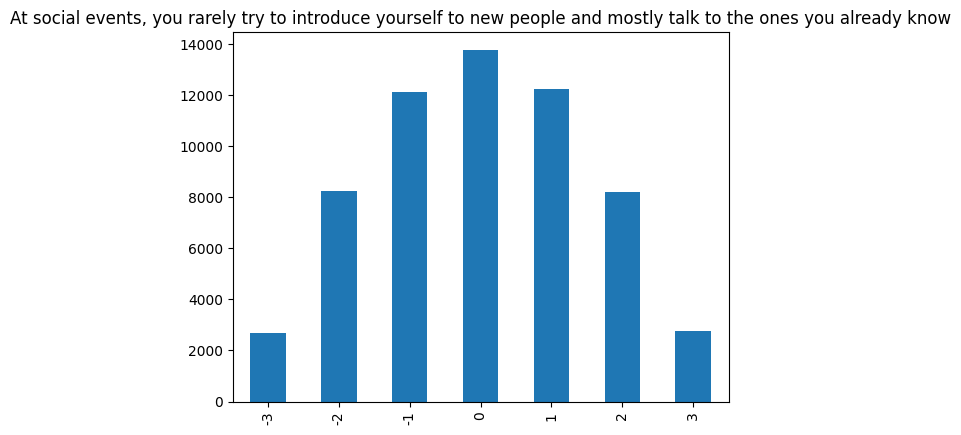

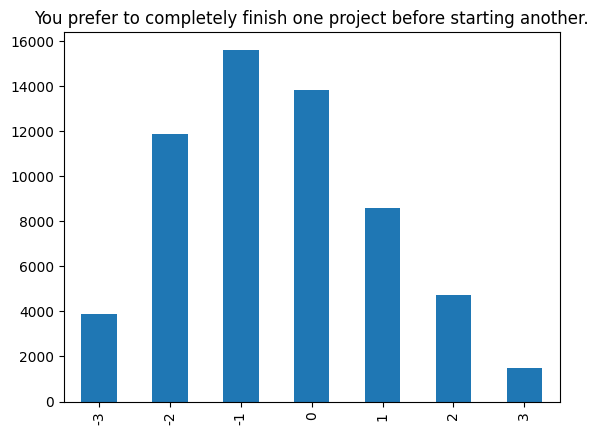

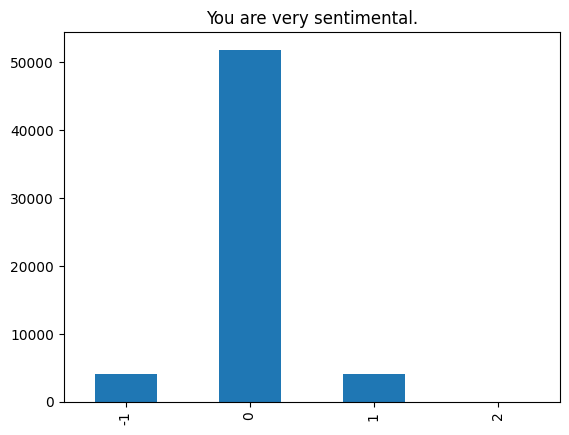

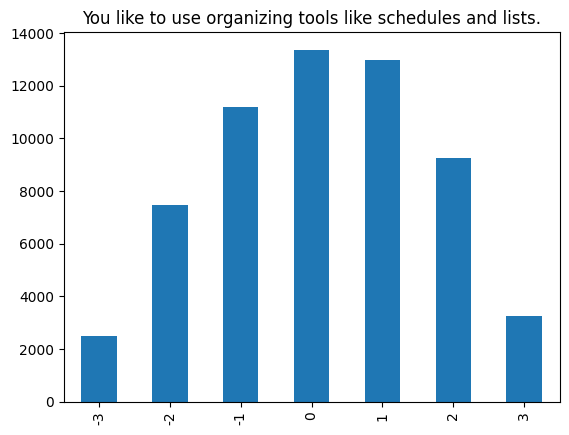

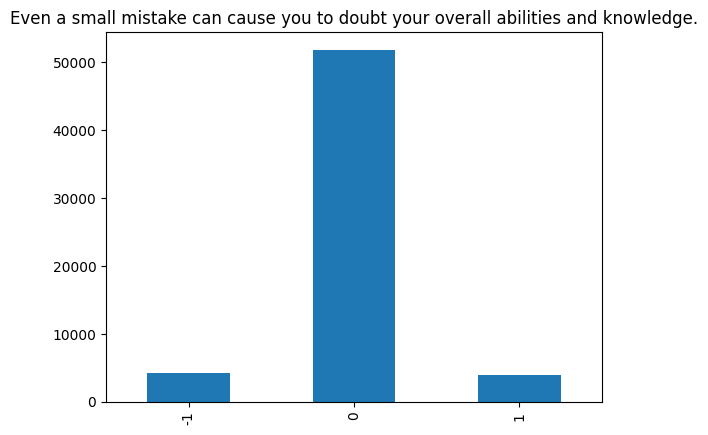

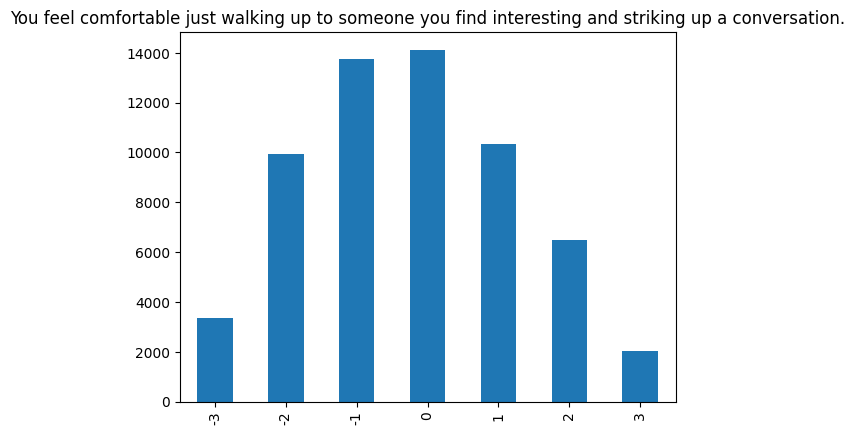

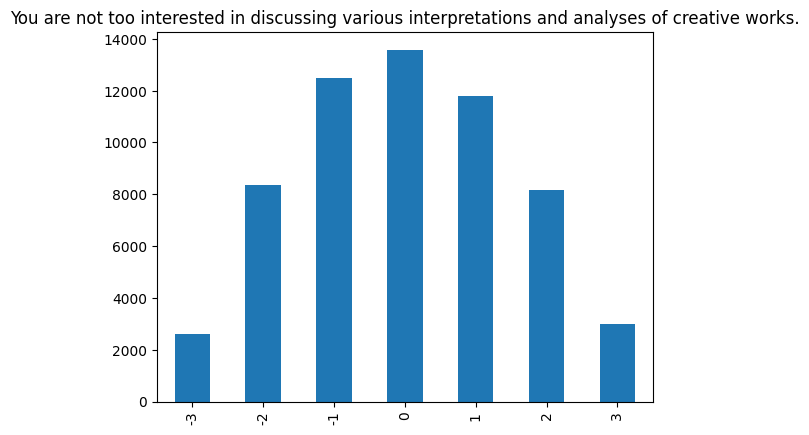

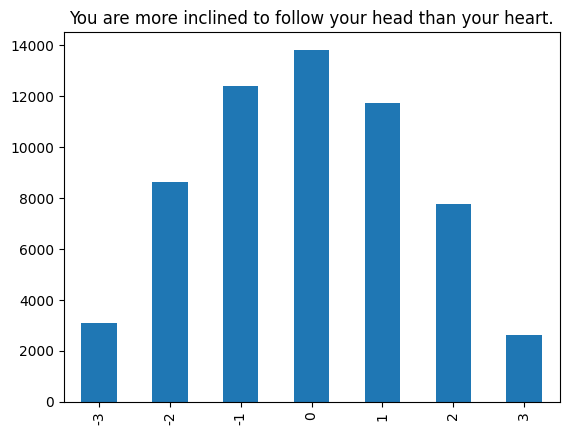

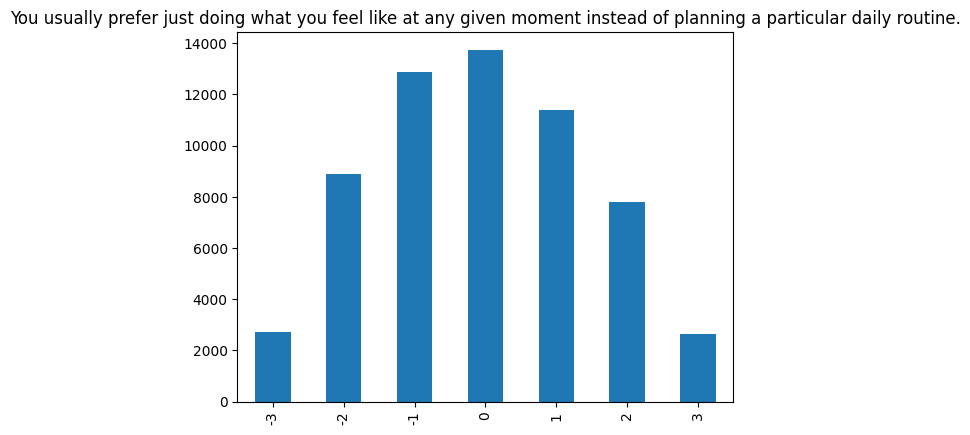

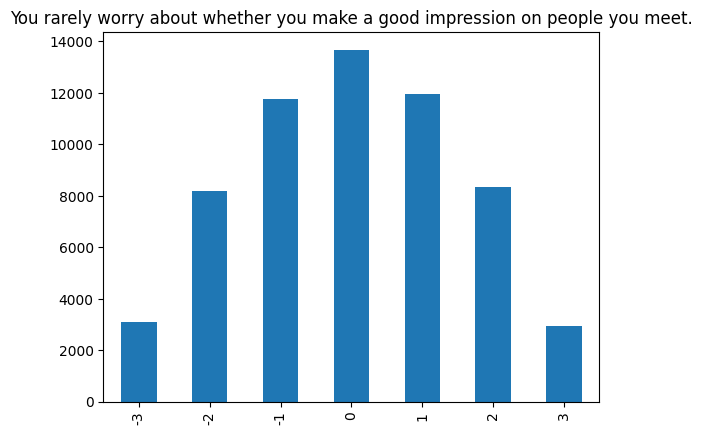

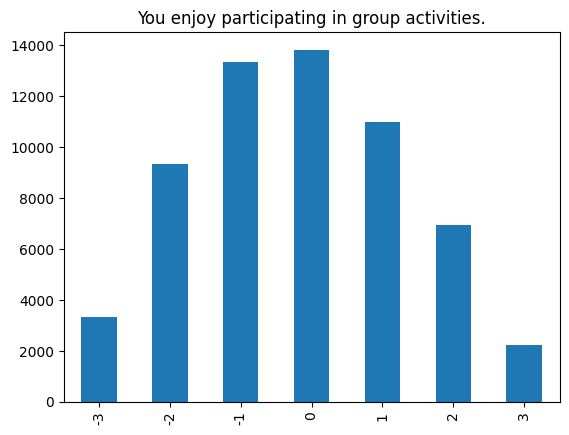

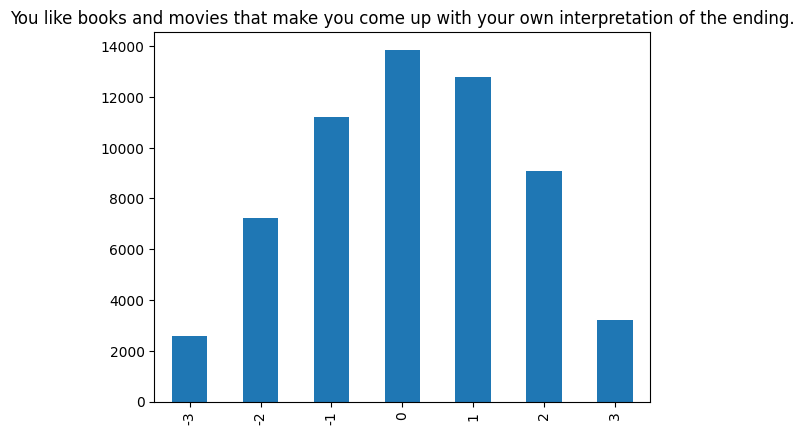

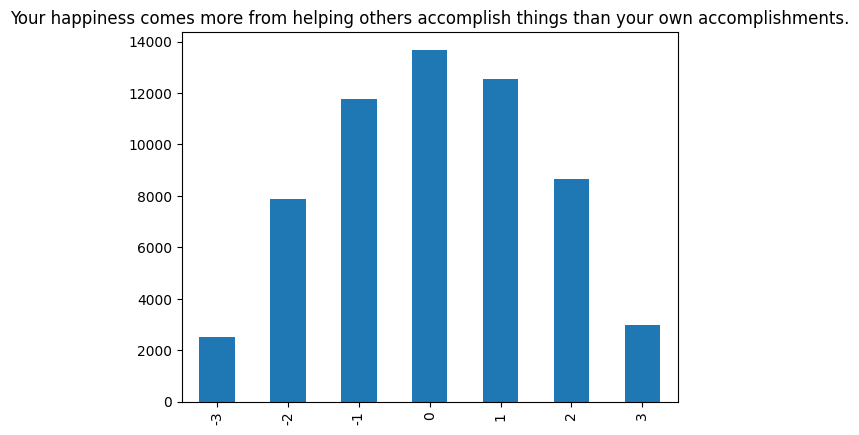

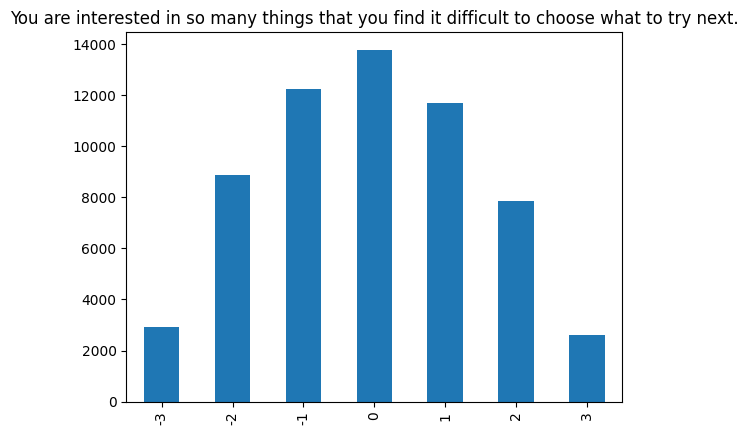

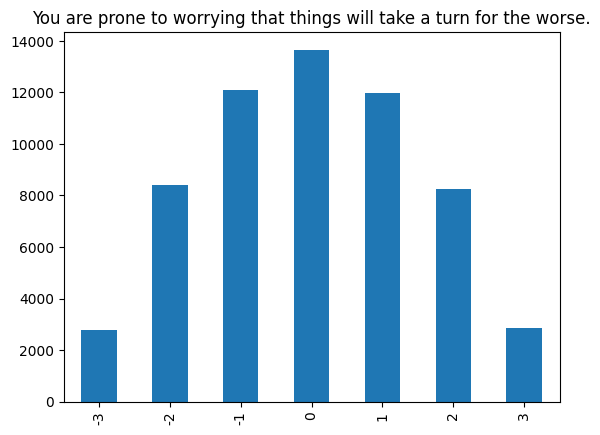

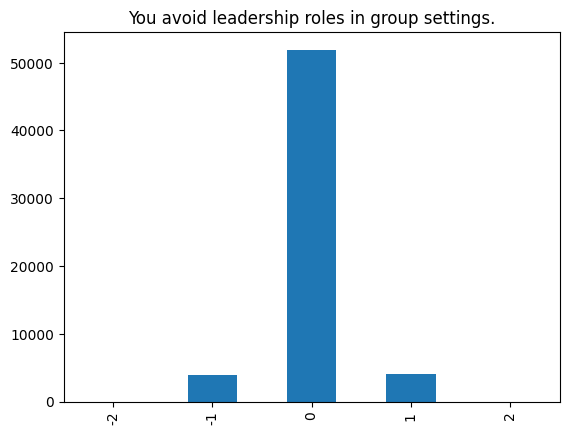

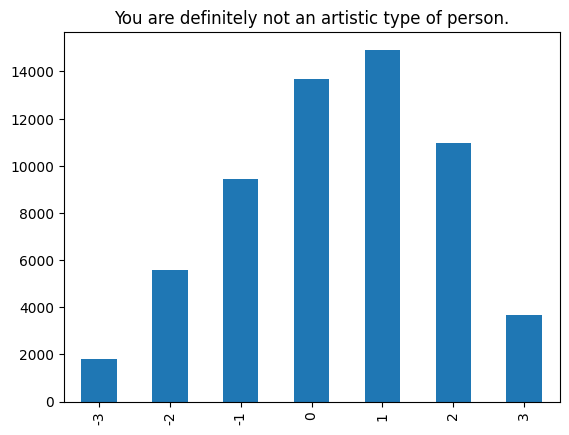

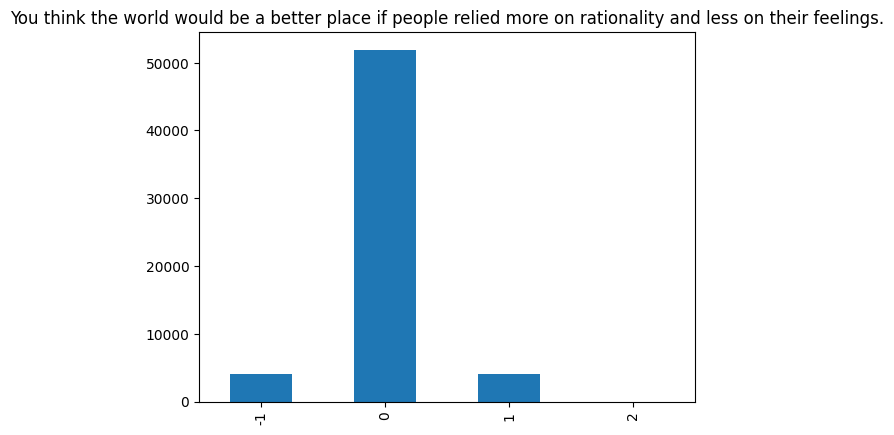

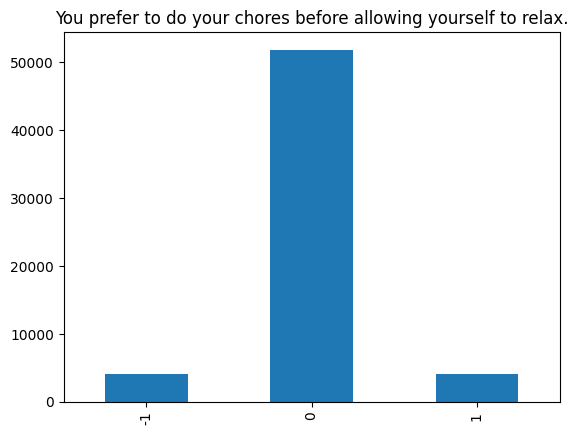

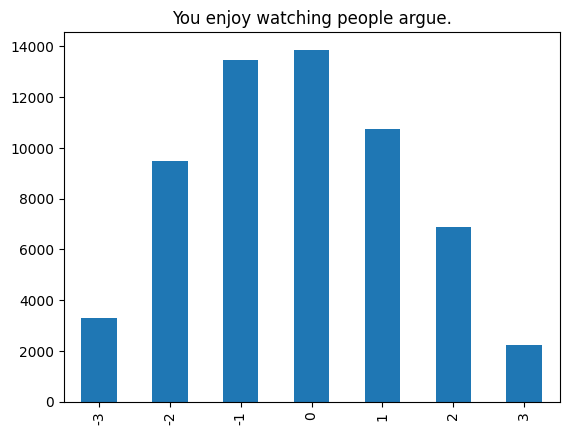

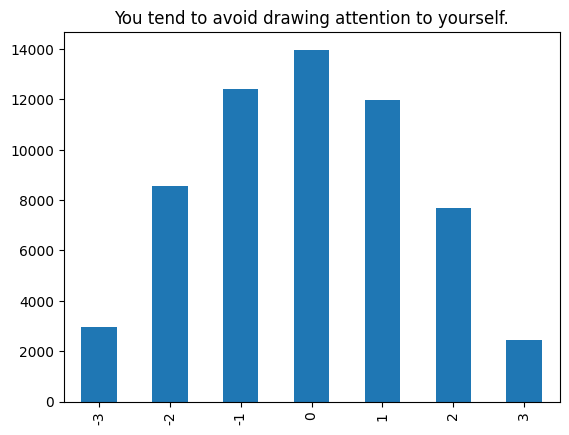

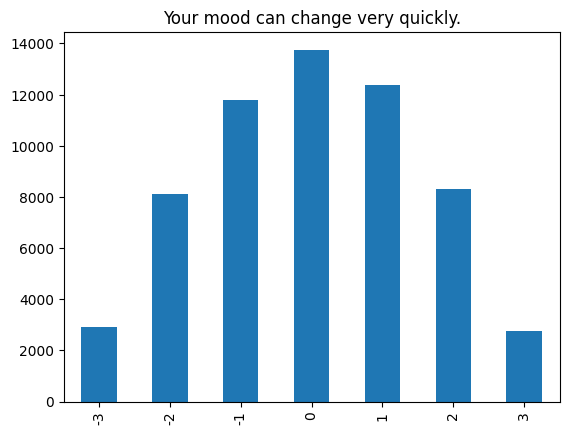

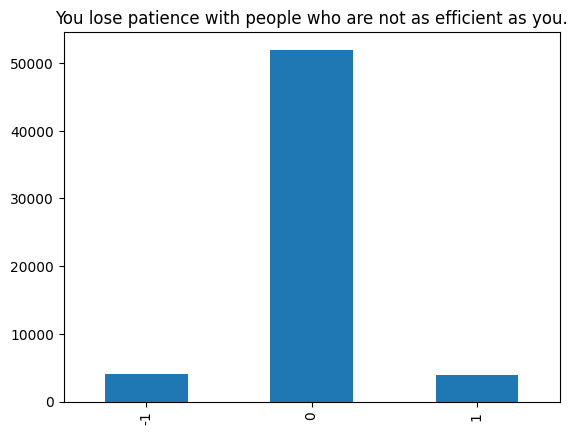

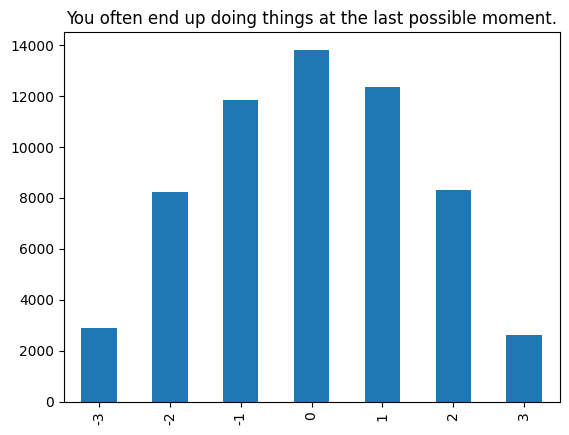

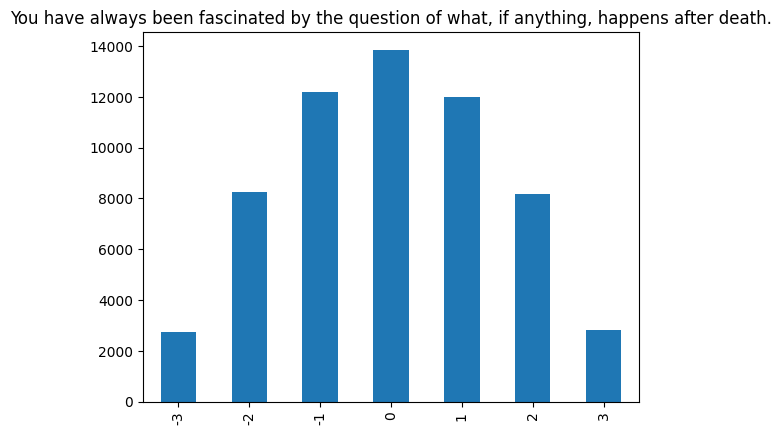

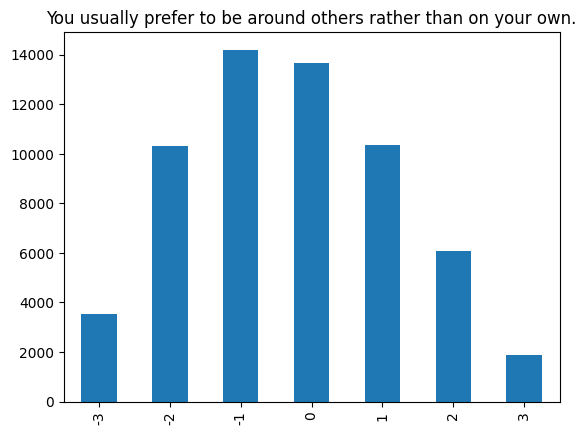

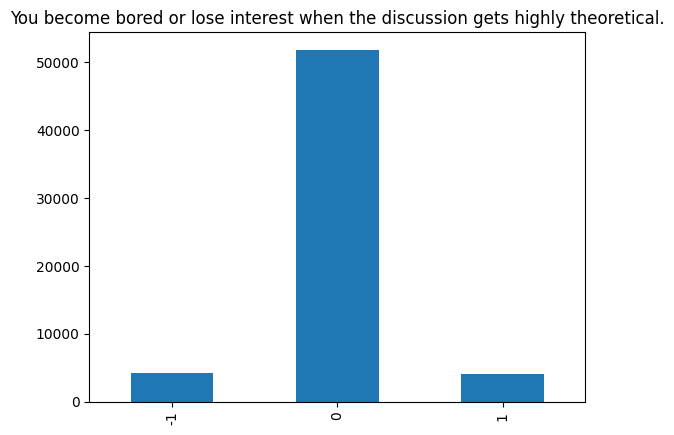

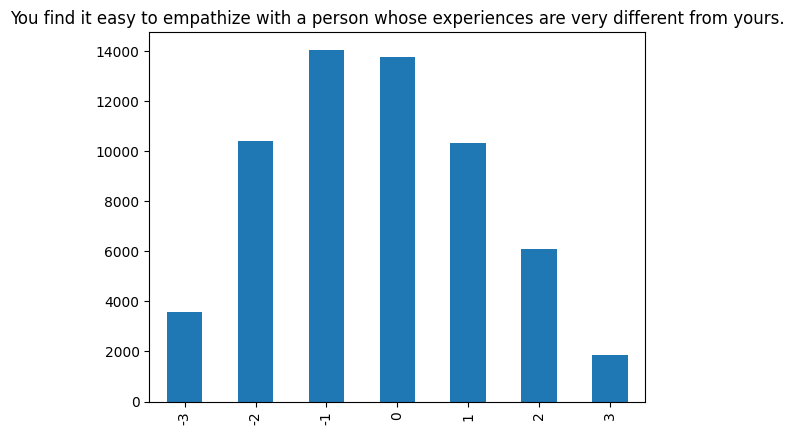

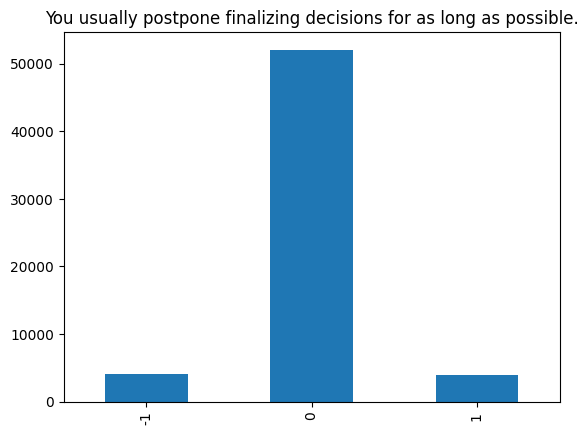

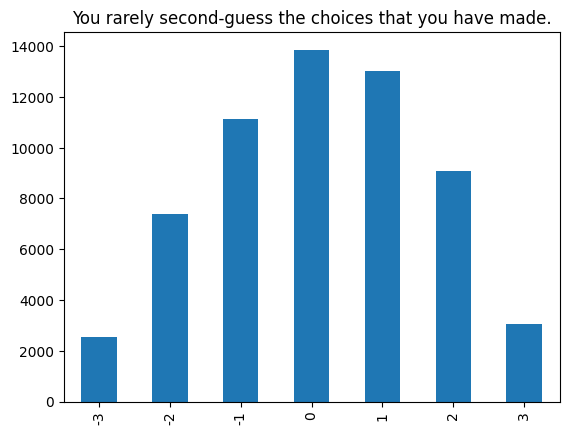

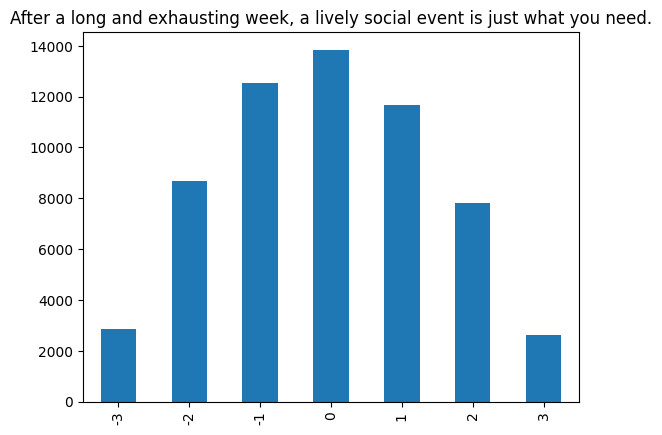

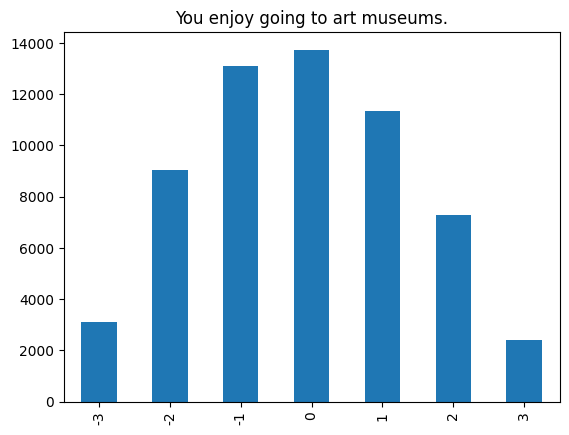

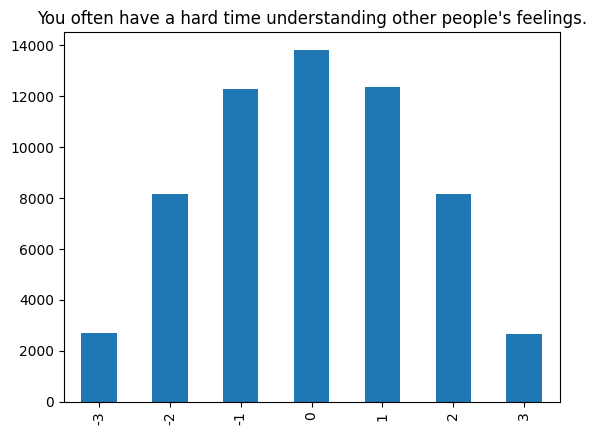

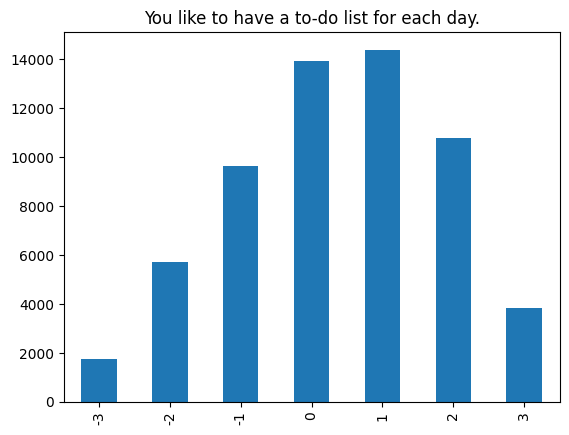

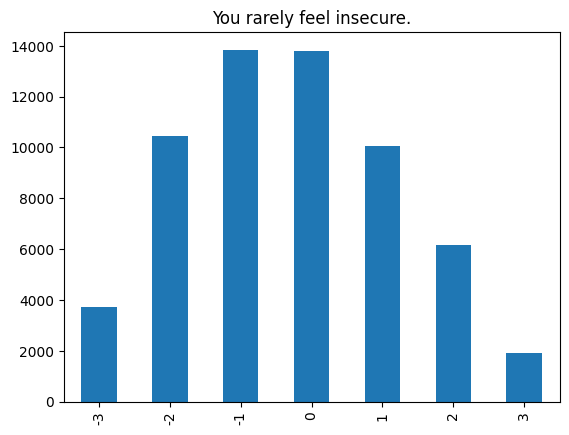

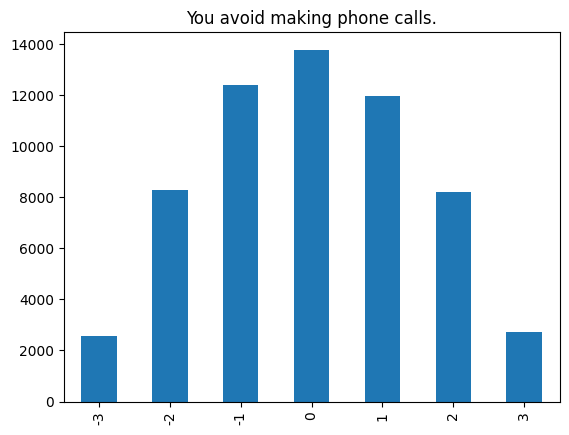

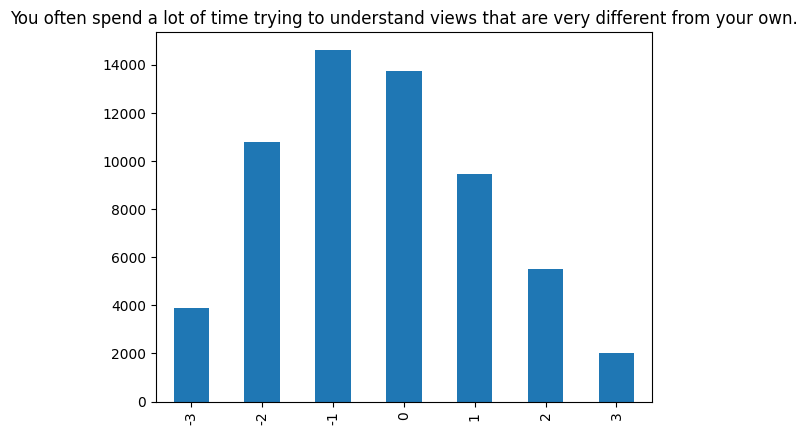

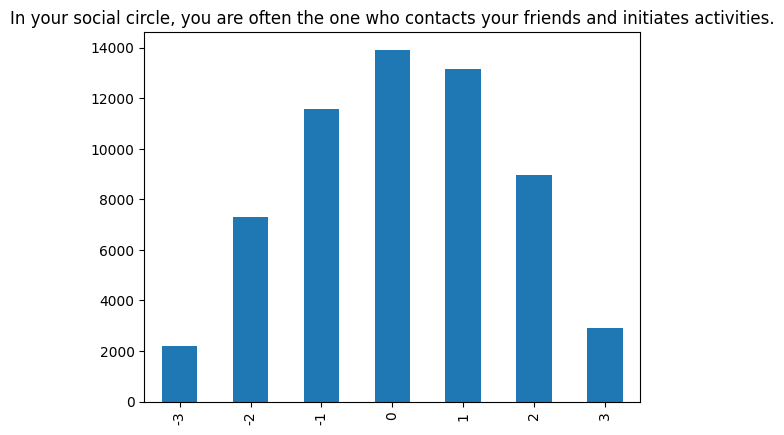

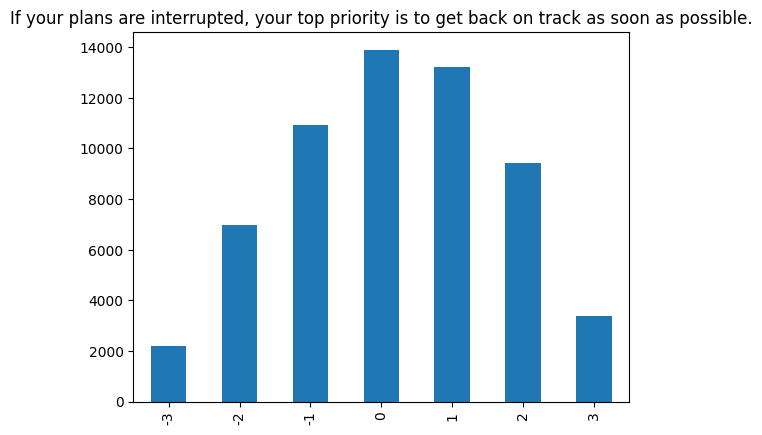

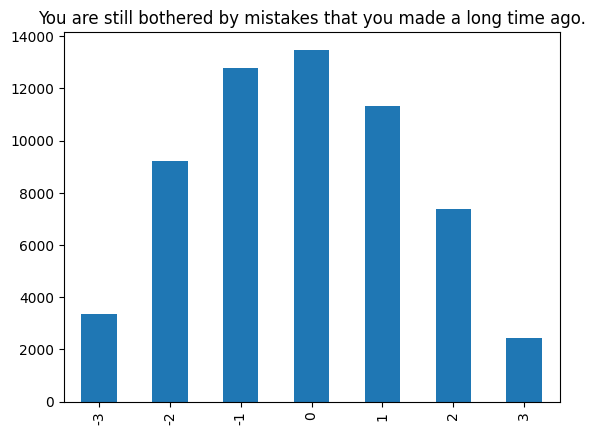

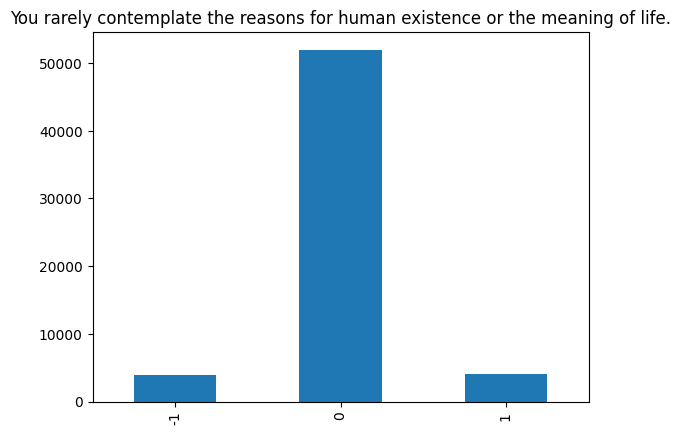

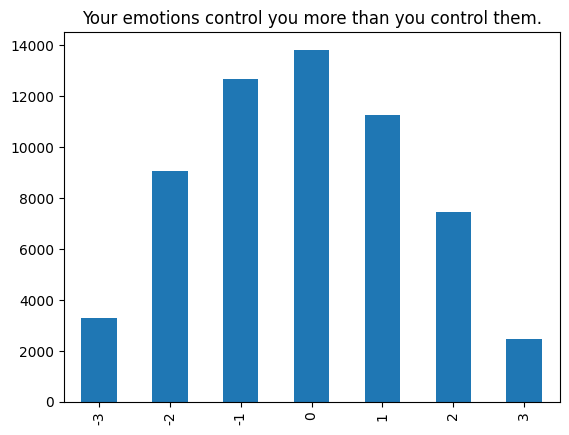

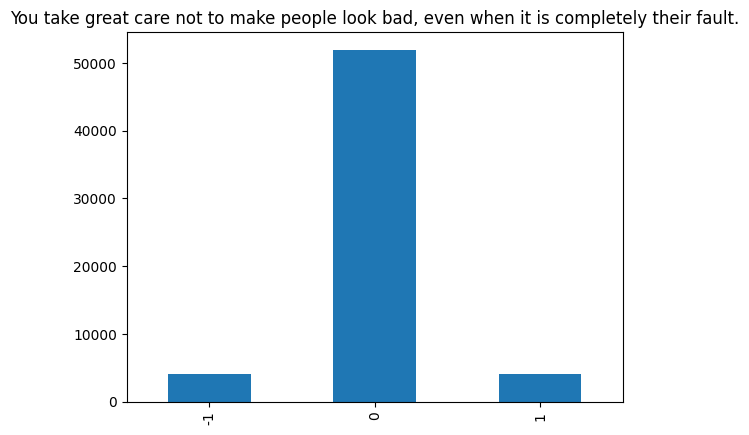

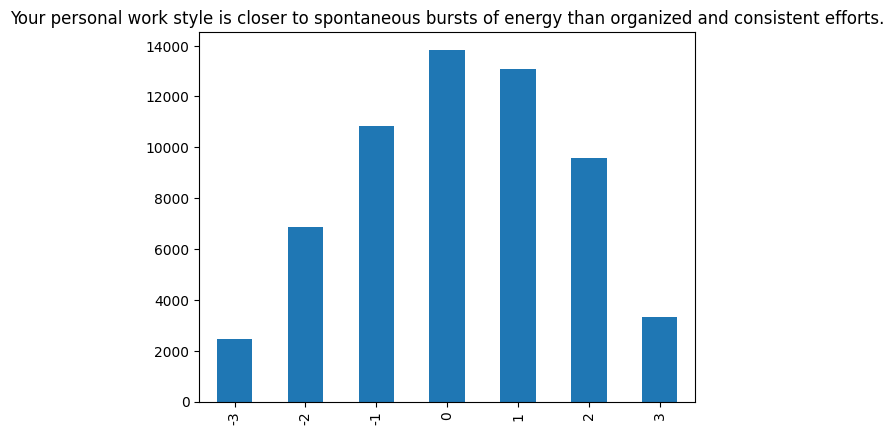

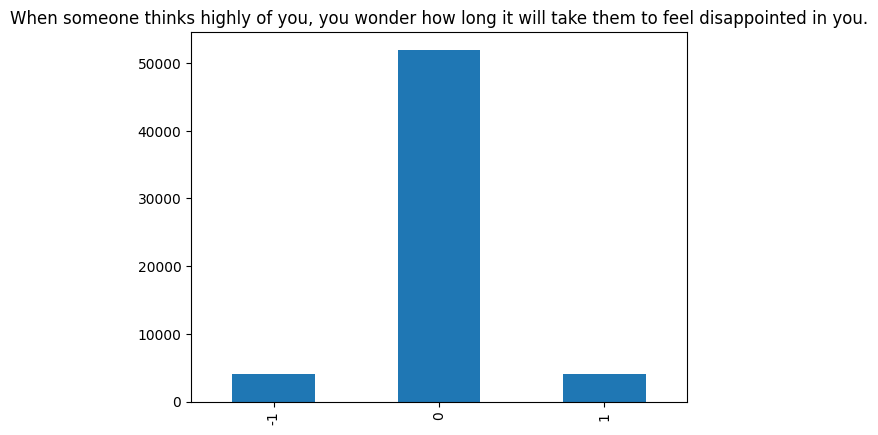

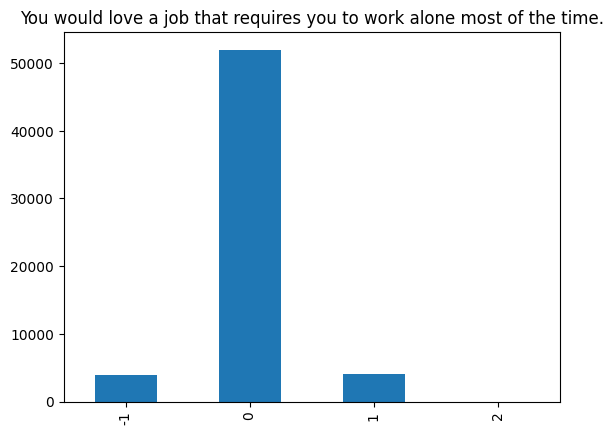

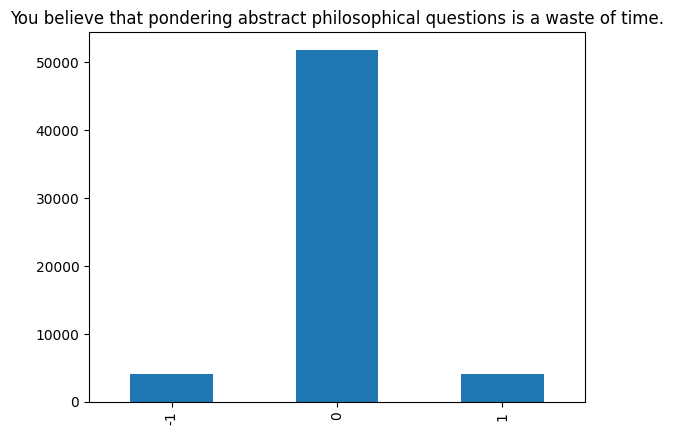

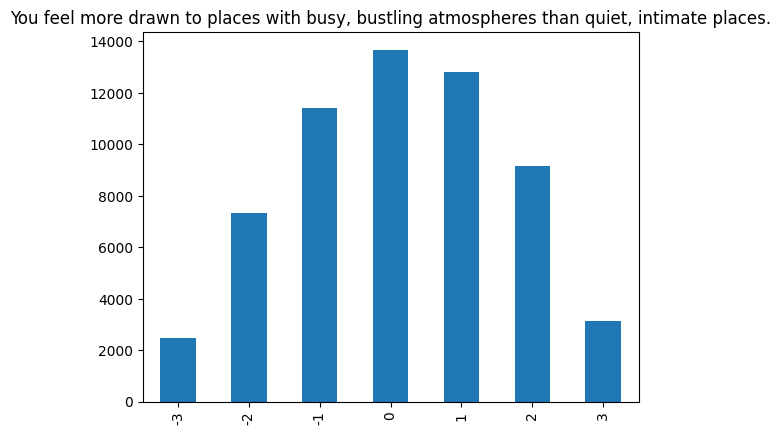

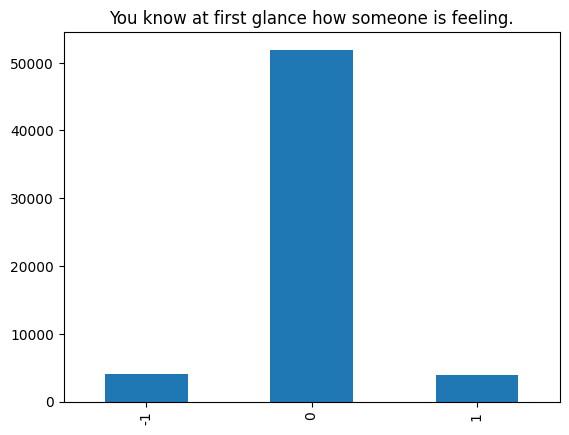

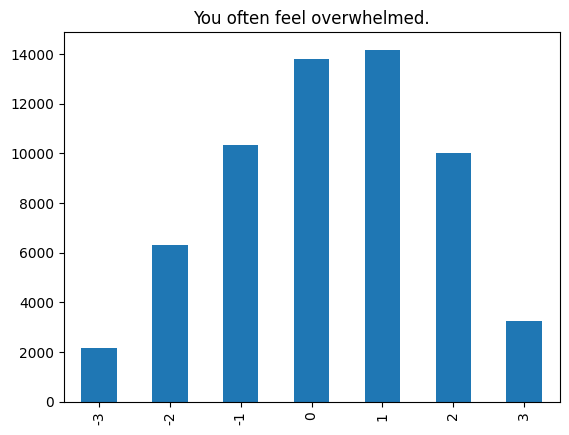

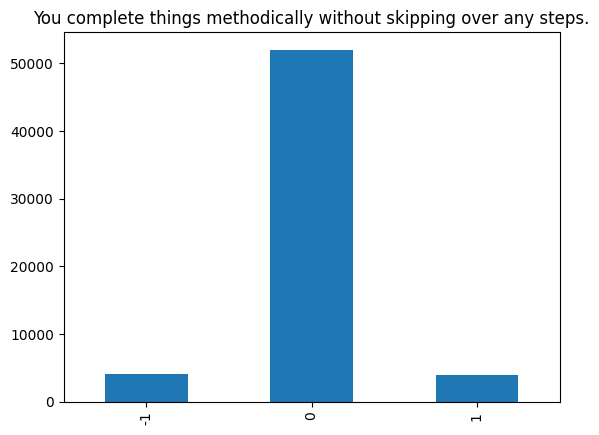

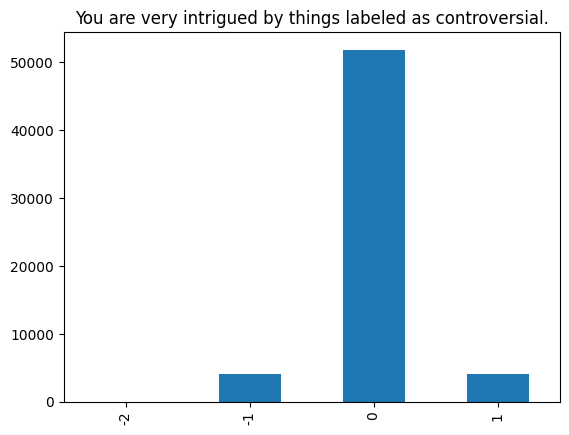

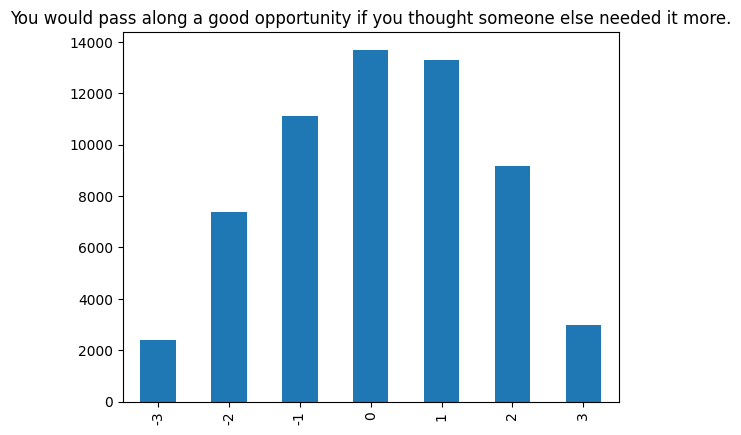

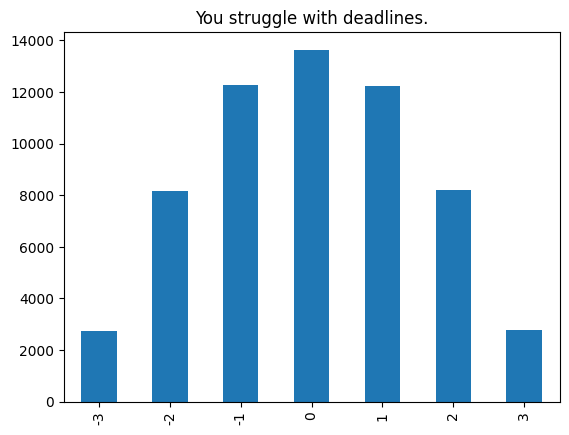

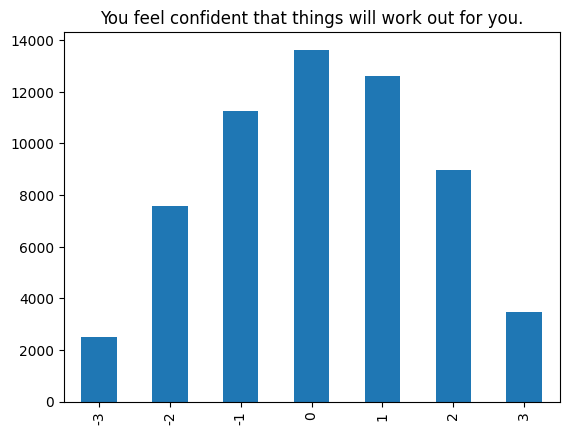

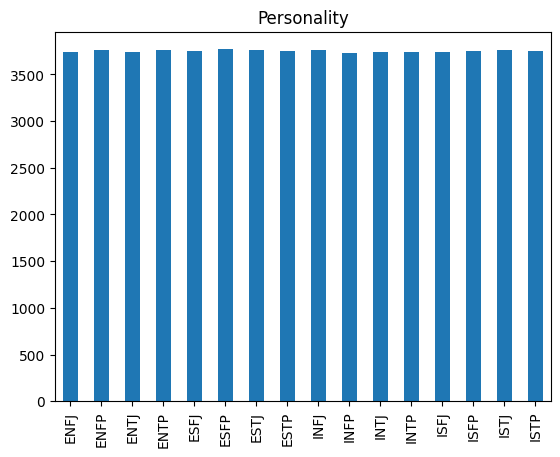

In [ ]:
for column in data.columns:
    value_counts = data[column].value_counts().sort_index()
    value_counts.plot(kind='bar', title=column)
    plt.show()

**Question 3**

*Part A*

The attributes could be seen as continuous or discrete, as they are numerical but only taking values -3, -2, -1, 0, 1, 2, and 3, which correspond to categories (ex. 3 means "Strongly Agree"). For logistic regression we decided to do one-hot encoding of the "discrete" attributes and for Naive Bayes' we decided to view the attributes as continuous.

*Part B*

For logistic regression, we decided to view the attributes as discrete (since they only take values -3, -2, -1, 0, 1, 2, and 3) and do one-hot encoding:

In [ ]:
#Encoding the features
for column in X.columns:
    X[column] = X[column].astype(str)

X_dummy = pd.get_dummies(X, prefix=list(X.columns), prefix_sep="=")

*Part C*

For Naive Bayes', we decided to do a Gaussian Naive Bayes' model because the attributes seem to have a Gaussian/normal distribution (based on the graphs in 2b) and they can be viewed as continuous. Although they are technically discrete, only taking values -3, -2, -1, 0, 1, 2, and 3, they have an ordering and a value between two attributes makes sense (for example, a value of 2.5 could be seen as a pretty strong agreement with the statement).

**Question 4**

*Part A*

In [ ]:
#Had to add these parameters for the basic one, since the default version wouldn't converge
log_reg = LogisticRegression(multi_class='ovr', solver='liblinear')

*Part B*

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB() # Gaussian Naive Bayes' model

**Question 5**

*Part A*

In [ ]:
from sklearn.model_selection import cross_validate
from statistics import mean
D = {}
D2 = {
    'Micro precision' : [],
    'Macro precision' : [],
    'Micro recall' : [],
    'Macro recall' : [],
    'Classifiers' : ['LR', 'GNB', 'LR NI', 'LR NC', 'GNB WP', 'GNB WS']
}
cv_log_reg = cross_validate(log_reg, X_dummy, Y, cv=4) # 4-fold cross validation
print("The scores for the cross_validation are:", cv_log_reg['test_score'])
print("Mean score is: ", mean(cv_log_reg['test_score']))
D['lr1'] = mean(cv_log_reg['test_score'])

In [ ]:
cv_gnb = cross_validate(gnb, X, Y, cv=4) # 4-fold cross validation
print("The scores for the cross_validation are:", cv_gnb['test_score'])
print("Mean score is: ", mean(cv_gnb['test_score']))
D['gnb1'] = mean(cv_gnb['test_score'])

The scores for the cross_validation are: [0.91173333 0.91046667 0.9112     0.90646043]
Mean score is:  0.9099651076738449


*Part B*

In [ ]:
from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict(log_reg, X_dummy, Y, cv=4) # predictions from the cross validation
results_df = pd.DataFrame({"Y" : list(Y), "Predictions" : list(predictions)}) # creating a dataframe to store the predictions
ct = pd.crosstab(results_df['Y'], results_df['Predictions'], rownames=['Y'], colnames=['Predictions']) # creating a cross table to visualize the predictions
ct

Predictions,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
Y,,,,,,,,,,,,,,,,
ENFJ,3503,18,7,12,42,7,4,12,15,22,20,22,27,5,7,20
ENFP,17,3550,10,15,31,15,5,8,6,8,24,16,28,10,8,9
ENTJ,8,3,3574,7,12,9,14,17,8,27,16,5,2,17,14,4
ENTP,17,10,18,3588,12,4,18,10,7,9,3,11,14,25,6,8
ESFJ,38,29,8,21,3275,31,29,48,60,21,49,57,12,18,26,24
ESFP,10,14,8,4,16,3592,27,18,9,7,5,14,18,5,8,14
ESTJ,5,17,12,8,17,16,3551,6,13,36,7,17,28,9,10,7
ESTP,9,7,10,9,37,20,5,3569,10,22,21,4,7,4,5,10
INFJ,7,3,10,14,57,14,12,19,3484,10,17,31,11,34,26,12


In this crosstable, we can see that the diagonal, which is the correct predictions, all have counts over 3000. For all the off-diagonal elements, all of the counts are less than 50, showing that this model is pretty accurate.

In [ ]:
predictions_gnb = cross_val_predict(gnb, X, Y, cv=4) # predictions from the cross validation
results_gnb = pd.DataFrame({"Y" : list(Y), "Predictions" : list(predictions_gnb)}) # creating a dataframe to store the predictions
ct_gnb = pd.crosstab(results_gnb['Y'], results_gnb['Predictions'], rownames=['Y'], colnames=['Predictions']) # creating a cross table to visualize the predictions
ct_gnb

Predictions,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
Y,,,,,,,,,,,,,,,,
ENFJ,3471,41,2,5,54,7,4,13,9,22,33,19,40,5,5,13
ENFP,28,3559,6,8,25,10,6,6,4,10,37,20,21,9,6,5
ENTJ,15,1,3543,6,20,14,13,10,9,41,18,5,2,18,15,7
ENTP,31,14,42,3522,20,3,27,6,10,12,2,6,13,35,8,9
ESFJ,73,50,11,9,3079,16,31,91,88,20,107,89,16,24,19,23
ESFP,11,25,6,2,35,3530,34,18,12,6,13,19,15,4,6,33
ESTJ,3,15,6,9,21,14,3542,5,13,36,5,16,50,13,7,4
ESTP,15,13,8,6,73,24,3,3522,9,24,23,7,6,2,6,8
INFJ,3,2,8,11,64,11,11,27,3428,23,22,34,11,26,74,6


Again, the cross table shows that the predictions are pretty accurate.

Then we calculated the precision/recall measures, both with micro and macro averages.

In [ ]:
from sklearn.metrics import precision_score, recall_score

# all these measurements compare the true value to the predicted value
print("Logistic regression")
print("Micro precision:", precision_score(results_df['Y'], results_df['Predictions'], average="micro"))
print("Macro precision:", precision_score(results_df['Y'], results_df['Predictions'], average="macro"))
print("Micro recall: ", recall_score(results_df['Y'], results_df['Predictions'], average="micro"))
print("Macro recall: ", recall_score(results_df['Y'], results_df['Predictions'], average="macro"))
D2['Micro precision'] += [precision_score(results_df['Y'], results_df['Predictions'], average="micro")]
D2['Macro precision'] += [precision_score(results_df['Y'], results_df['Predictions'], average="macro")]
D2['Micro recall'] += [recall_score(results_df['Y'], results_df['Predictions'], average="micro")]
D2['Macro recall'] += [recall_score(results_df['Y'], results_df['Predictions'], average="macro")]

print("\nNaive Bayes Classifier")
print("Micro precision:", precision_score(results_gnb['Y'], results_gnb['Predictions'], average="micro"))
print("Macro precision:", precision_score(results_gnb['Y'], results_gnb['Predictions'], average="macro"))
print("Micro recall: ", recall_score(results_gnb['Y'], results_gnb['Predictions'], average="micro"))
print("Macro recall: ", recall_score(results_gnb['Y'], results_gnb['Predictions'], average="macro"))
D2['Micro precision'] += [precision_score(results_gnb['Y'], results_gnb['Predictions'], average="micro")]
D2['Macro precision'] += [precision_score(results_gnb['Y'], results_gnb['Predictions'], average="macro")]
D2['Micro recall'] += [recall_score(results_gnb['Y'], results_gnb['Predictions'], average="micro")]
D2['Macro recall'] += [recall_score(results_gnb['Y'], results_gnb['Predictions'], average="macro")]

Logistic regression
Micro precision: 0.9281821363689395
Macro precision: 0.9281526225217851
Micro recall:  0.9281821363689395
Macro recall:  0.9281602578369259

Naive Bayes Classifier
Micro precision: 0.9099651660861015
Macro precision: 0.9103124998567098
Micro recall:  0.9099651660861015
Macro recall:  0.9099362043944864


**Question 6**

*Part A - Logistic Regression*

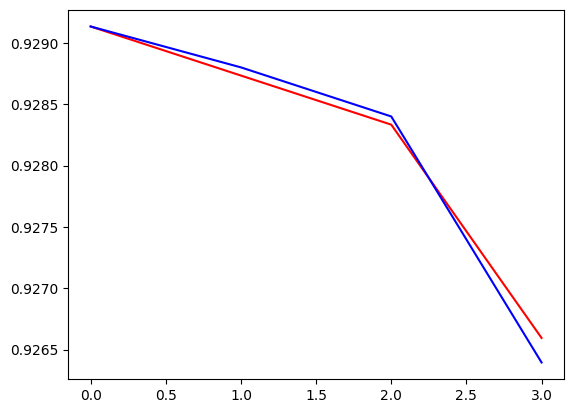

Mean accuracy:  0.9281987765851056
Micro precision: 0.9281988033133886
Macro precision: 0.9281669321993393
Micro recall:  0.9281988033133886
Macro recall:  0.9281769618087161


In [ ]:
#Modifying the solver to be newton-cholesky
log_reg_nc = LogisticRegression(solver='newton-cholesky')
cross_val_nc = cross_validate(log_reg_nc, X_dummy, Y, cv=4)
plt.plot(range(4), cross_val_nc['test_score'], color="red")
plt.plot(range(4), cv_log_reg['test_score'], color="blue")
plt.show()
print("Mean accuracy: ", mean(cross_val_nc['test_score']))
D['LR NC'] = mean(cross_val_nc['test_score'])
predictions_nc = cross_val_predict(log_reg_nc, X_dummy, Y, cv=4)
results_nc = pd.DataFrame({"Y" : list(Y), "Predictions" : list(predictions_nc)}) # creating a dataframe to store the predictions
print("Micro precision:", precision_score(results_nc['Y'], results_nc['Predictions'], average="micro"))
print("Macro precision:", precision_score(results_nc['Y'], results_nc['Predictions'], average="macro"))
print("Micro recall: ", recall_score(results_nc['Y'], results_nc['Predictions'], average="micro"))
print("Macro recall: ", recall_score(results_nc['Y'], results_nc['Predictions'], average="macro"))
D2['Micro precision'] += [precision_score(results_nc['Y'], results_nc['Predictions'], average="micro")]
D2['Macro precision'] += [precision_score(results_nc['Y'], results_nc['Predictions'], average="macro")]
D2['Micro recall'] += [recall_score(results_nc['Y'], results_nc['Predictions'], average="micro")]
D2['Macro recall'] += [recall_score(results_nc['Y'], results_nc['Predictions'], average="macro")]
#The previous model is blue and the new model is red

The documentation for logistic regression (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html ) recommends the newton-cholesky when you have a lot of one-hot encoded features. The source says "‘newton-cholesky’ is a good choice for n_samples >> n_features, especially with one-hot encoded categorical features with rare categories. Note that it is limited to binary classification and the one-versus-rest reduction for multiclass classification."

However, in the model that we tested, we found that there was a considerable reduction in accuracy.

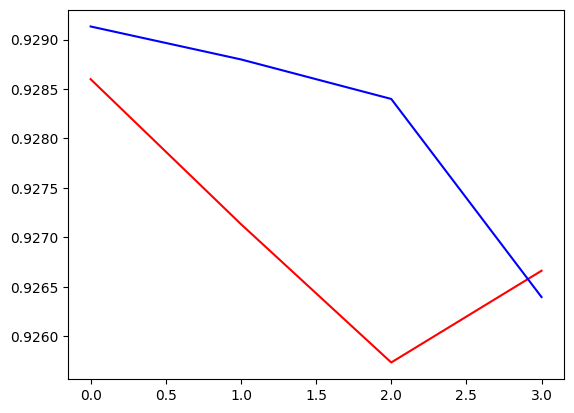

Mean accuracy:  0.9270321110296242


In [ ]:
#Modifying the model to not have an intercept
log_reg_no_intercept = LogisticRegression(fit_intercept=False, max_iter=1000)
cross_val_ni = cross_validate(log_reg_no_intercept, X_dummy, Y, cv=4) # 4-fold cross validation
plt.plot(range(4), cross_val_ni['test_score'], color="red")
plt.plot(range(4), cv_log_reg['test_score'], color="blue")
plt.show()
print("Mean accuracy: ", mean(cross_val_ni['test_score']))
D['LR NI'] = mean(cross_val_ni['test_score'])
#The previous model is blue and the new model is red

In [ ]:
predictions_ni = cross_val_predict(log_reg_nc, X_dummy, Y, cv=4) # 4-fold cross validation
results_ni = pd.DataFrame({"Y" : list(Y), "Predictions" : list(predictions_ni)}) # creating a dataframe to store the predictions
print("Micro precision:", precision_score(results_ni['Y'], results_ni['Predictions'], average="micro"))
print("Macro precision:", precision_score(results_ni['Y'], results_ni['Predictions'], average="macro"))
print("Micro recall: ", recall_score(results_ni['Y'], results_ni['Predictions'], average="micro"))
print("Macro recall: ", recall_score(results_ni['Y'], results_ni['Predictions'], average="macro"))
D2['Micro precision'] += [precision_score(results_ni['Y'], results_ni['Predictions'], average="micro")]
D2['Macro precision'] += [precision_score(results_ni['Y'], results_ni['Predictions'], average="macro")]
D2['Micro recall'] += [recall_score(results_ni['Y'], results_ni['Predictions'], average="micro")]
D2['Macro recall'] += [recall_score(results_ni['Y'], results_ni['Predictions'], average="macro")]

In this model, we can see that there's a much lower accuracy once you remove the intercept.


*Part A - Naive Bayes'*

The first parameter we decided to adjust is the the priors. This dataset has a fairly uniform distribution of the personality types. That is, there is approximately an equal amount of each personality type in the dataset. However, this is not the case in real life. Different sources have different numbers, but in general it is agreed that ISFJ is a popular personality type (13.8% of the population, according to reference [1]) and INFJ is a rare personality type (1.5% of the population, according to reference [1]). We used the proportions from reference [1] as prior probabilities in the new model below.

In [ ]:
gnb_with_priors = GaussianNB(priors = [0.025, 0.081, 0.018, 0.032, 0.120, 0.085, 0.087, 0.043,
                                         0.015, 0.044, 0.021, 0.033, 0.138, 0.088, 0.116, 0.054]) # priors are stored in alphabetical order of the response variable (ENFJ, ENFP, ..., ISTP)

In [ ]:
cv_gnb_with_priors = cross_validate(gnb_with_priors, X, Y, cv=4) # 4-fold cross validation
print("The scores for the cross_validation are:", cv_gnb_with_priors['test_score'])
print("Mean accuracy: ", mean(cv_gnb_with_priors['test_score']))
D['GNP WP'] = mean(cv_gnb_with_priors['test_score'])

In [ ]:
predictions_gnb_with_priors = cross_val_predict(gnb_with_priors, X, Y, cv=4) # 4-fold cross validation
results_gnb_with_priors = pd.DataFrame({"Y" : list(Y), "Predictions" : list(predictions_gnb_with_priors)}) # creating a dataframe to store the predictions
print("Micro precision:", precision_score(results_gnb_with_priors['Y'], results_gnb_with_priors['Predictions'], average="micro"))
print("Macro precision:", precision_score(results_gnb_with_priors['Y'], results_gnb_with_priors['Predictions'], average="macro"))
print("Micro recall: ", recall_score(results_gnb_with_priors['Y'], results_gnb_with_priors['Predictions'], average="micro"))
print("Macro recall: ", recall_score(results_gnb_with_priors['Y'], results_gnb_with_priors['Predictions'], average="macro"))
D2['Micro precision'] += [precision_score(results_gnb_with_priors['Y'], results_gnb_with_priors['Predictions'], average="micro")]
D2['Macro precision'] += [precision_score(results_gnb_with_priors['Y'], results_gnb_with_priors['Predictions'], average="macro")]
D2['Micro recall'] += [recall_score(results_gnb_with_priors['Y'], results_gnb_with_priors['Predictions'], average="micro")]
D2['Macro recall'] += [recall_score(results_gnb_with_priors['Y'], results_gnb_with_priors['Predictions'], average="macro")]

The precisions/recalls are about the same (just slightly lower). This makes sense, because the model is tested on a sample of the training data, where the personality types are uniformly distributed. So for this particular dataset, the "real-life" priors do not help improve accuracy.

The second parameter we decided to add is the smoothing factor. Adding a smoothing factor also does not help with improving precisions/recalls much, as none of the attributes have zero variance to start with. So smoothing is not useful.

In [ ]:
gnb_with_smoothing = GaussianNB(var_smoothing=1e-03)

In [ ]:
cv_gnb_with_smoothing = cross_validate(gnb_with_smoothing, X, Y, cv=4)
print("The scores for the cross_validation are:", cv_gnb_with_smoothing['test_score'])
print("Mean accuracy: ", mean(cv_gnb_with_smoothing['test_score']))
D['GNG WS'] = mean(cv_gnb_with_smoothing['test_score'])

In [ ]:
predictions_gnb_with_smoothing = cross_val_predict(gnb_with_smoothing, X, Y, cv=4)
results_gnb_with_smoothing = pd.DataFrame({"Y" : list(Y), "Predictions" : list(predictions_gnb_with_smoothing)}) # creating a dataframe to store the predictions
print("Micro precision:", precision_score(results_gnb_with_smoothing['Y'], results_gnb_with_smoothing['Predictions'], average="micro"))
print("Macro precision:", precision_score(results_gnb_with_smoothing['Y'], results_gnb_with_smoothing['Predictions'], average="macro"))
print("Micro recall: ", recall_score(results_gnb_with_smoothing['Y'], results_gnb_with_smoothing['Predictions'], average="micro"))
print("Macro recall: ", recall_score(results_gnb_with_smoothing['Y'], results_gnb_with_smoothing['Predictions'], average="macro"))
D2['Micro precision'] += [precision_score(results_gnb_with_smoothing['Y'], results_gnb_with_smoothing['Predictions'], average="micro")]
D2['Macro precision'] += [precision_score(results_gnb_with_smoothing['Y'], results_gnb_with_smoothing['Predictions'], average="macro")]
D2['Micro recall'] += [recall_score(results_gnb_with_smoothing['Y'], results_gnb_with_smoothing['Predictions'], average="micro")]
D2['Macro recall'] += [recall_score(results_gnb_with_smoothing['Y'], results_gnb_with_smoothing['Predictions'], average="macro")]

**Question 7**

In [ ]:
def sort_keys(D):
  maxs = []
  max_keys = []
  while len(D) > 0:
    max = 0
    for key in D.keys():
      if D[key] > max:
        max = D[key]
        max_key = key
    maxs.append(max)
    max_keys.append(max_key)
    D.pop(max_key, None)
    print(max_key, max)
  return maxs, max_keys

D = {'lr1' : 0.9281821065848834,
 'gnb1' : 0.9099651076738449,
 'lrni' : 0.9195003883953701,
 'lrnc' : 0.923903517045086,
 'gnbwp' : 0.9016149332177701,
 'gnbws' : 0.9100651054514746
}
maxs, max_keys = sort_keys(D)
print("\n")
plt.bar(max_keys, maxs)
plt.ylim(0.9, 0.93)
plt.title("Mean accuracy for different classifiers")
plt.show()

In [ ]:
D2 = {
    'Micro precision' : [0.9281821363689395, 0.9099651660861015, 0.9281988033133886, 0.9281988033133886, 0.9016150269171153, 0.9100651677527959],
    'Macro precision' : [0.9281526225217851, 0.9103124998567098, 0.9281669321993393, 0.9281669321993393, 0.9051506526749822, 0.9104164095998157],
    'Micro recall' : [0.9281821363689395, 0.9099651660861015, 0.9281988033133886, 0.9281988033133886, 0.9016150269171153, 0.9100651677527959],
    'Macro recall' : [0.9281602578369259, 0.9099362043944864, 0.9281769618087161, 0.9281769618087161, 0.9015850977503008, 0.9100360760632632],
    'Classifiers' : ['LR', 'GNB', 'LR NI', 'LR NC', 'GNB WP', 'GNB WS']
}
plt.bar(D2['Classifiers'], D2['Micro precision'])
plt.ylim(0.9, 0.93)
plt.title("Micro precision for different classifiers")
plt.show()

In [ ]:
plt.bar(D2['Classifiers'], D2['Macro precision'])
plt.ylim(0.9, 0.93)
plt.title("Macro precision for different classifiers")
plt.show()

In [ ]:
plt.bar(D2['Classifiers'], D2['Micro recall'])
plt.ylim(0.9, 0.93)
plt.title("Micro recall for different classifiers")
plt.show()

In [ ]:
plt.bar(D2['Classifiers'], D2['Macro recall'])
plt.ylim(0.9, 0.93)
plt.title("Macro recall for different classifiers")
plt.show()

As we can see above, a logistic regression based classifier seems to have a higher accuracy than a Gaussian Naive Bayes' classifier in regards to mean accuracy, micro precision, macro precision, micro recall and macr0 recall. However, between each of these categories, the differences are pretty small and would require further analysis.

Furthermore, we made the choice to do the logistic regression with one-hot encoding and the naive bayes classifier without one-hot encoding which could also explain some of the differences in accuracy.

**References**

1. https://personalitymax.com/personality-types/population-gender/
2. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html#sklearn.model_selection.cross_val_predict
4. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
5. https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
